# Milan Kovacs
## 21308128

Task:  
Replicate the classifier training and evaluation demonstrated in the example notebook Lab 4 - Comparison of Binary Classifiers.ipynb but with the dataset seeds.csv. You will need to formulate a binary classification problem and transform the type column accordingly. That is, replace the type column with a binary column called class in which one of the original three types (it doesn't matter which one you choose) is class 0, and the other two types are class 1.


In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("./seeds.csv")
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
df.tail()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [13]:
df['type'].value_counts()

type
1    70
2    70
3    70
Name: count, dtype: int64

I will try and classify `Type 1`, meaning `Type 2` and `Type 3` are the incorrect ones.

We have 3 classifications and it is balanced

In [5]:
df.isna().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
type                       0
dtype: int64

No missing values, thus we can continue with processing the data. We have 7 attributes and 1 target value, we can do two boxplots of 4 and 3.

In [6]:
df.loc[:, 'area': 'length of kernel'].describe()

,area,perimeter,compactness,length of kernel
count,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533
std,2.909699,1.305959,0.023629,0.443063
min,10.590000,12.410000,0.808100,4.899000
25%,12.270000,13.450000,0.856900,5.262250
50%,14.355000,14.320000,0.873450,5.523500
75%,17.305000,15.715000,0.887775,5.979750
max,21.180000,17.250000,0.918300,6.675000


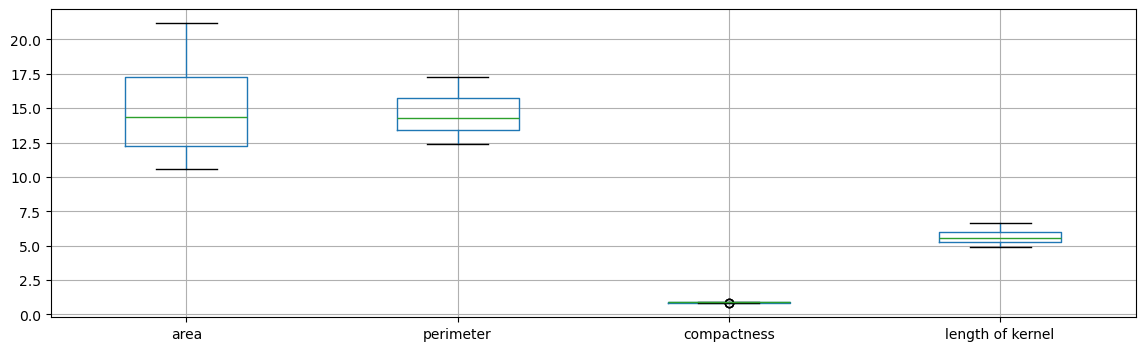

In [8]:
df.loc[:, 'area': 'length of kernel'].boxplot(figsize=(14, 4))
plt.show()

In [11]:
df.loc[:, 'width of kernel': 'length of kernel groove'].describe()

,width of kernel,asymmetry coefficient,length of kernel groove
count,210.000000,210.000000,210.000000
mean,3.258605,3.700201,5.408071
std,0.377714,1.503557,0.491480
min,2.630000,0.765100,4.519000
25%,2.944000,2.561500,5.045000
50%,3.237000,3.599000,5.223000
75%,3.561750,4.768750,5.877000
max,4.033000,8.456000,6.550000


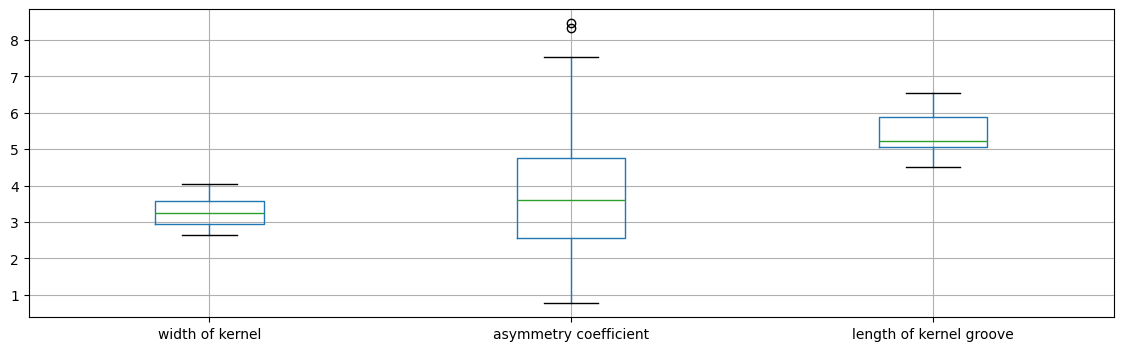

In [12]:
df.loc[:, 'width of kernel': 'length of kernel groove'].boxplot(figsize=(14, 4))
plt.show()

`Compactness` and `Asymmetry Coefficient` are the two attributes with outliers.

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'perimeter'}>,
        <Axes: title={'center': 'compactness'}>],
       [<Axes: title={'center': 'length of kernel'}>,
        <Axes: title={'center': 'width of kernel'}>,
        <Axes: title={'center': 'asymmetry coefficient'}>],
       [<Axes: title={'center': 'length of kernel groove'}>,
        <Axes: title={'center': 'type'}>, <Axes: >]], dtype=object)

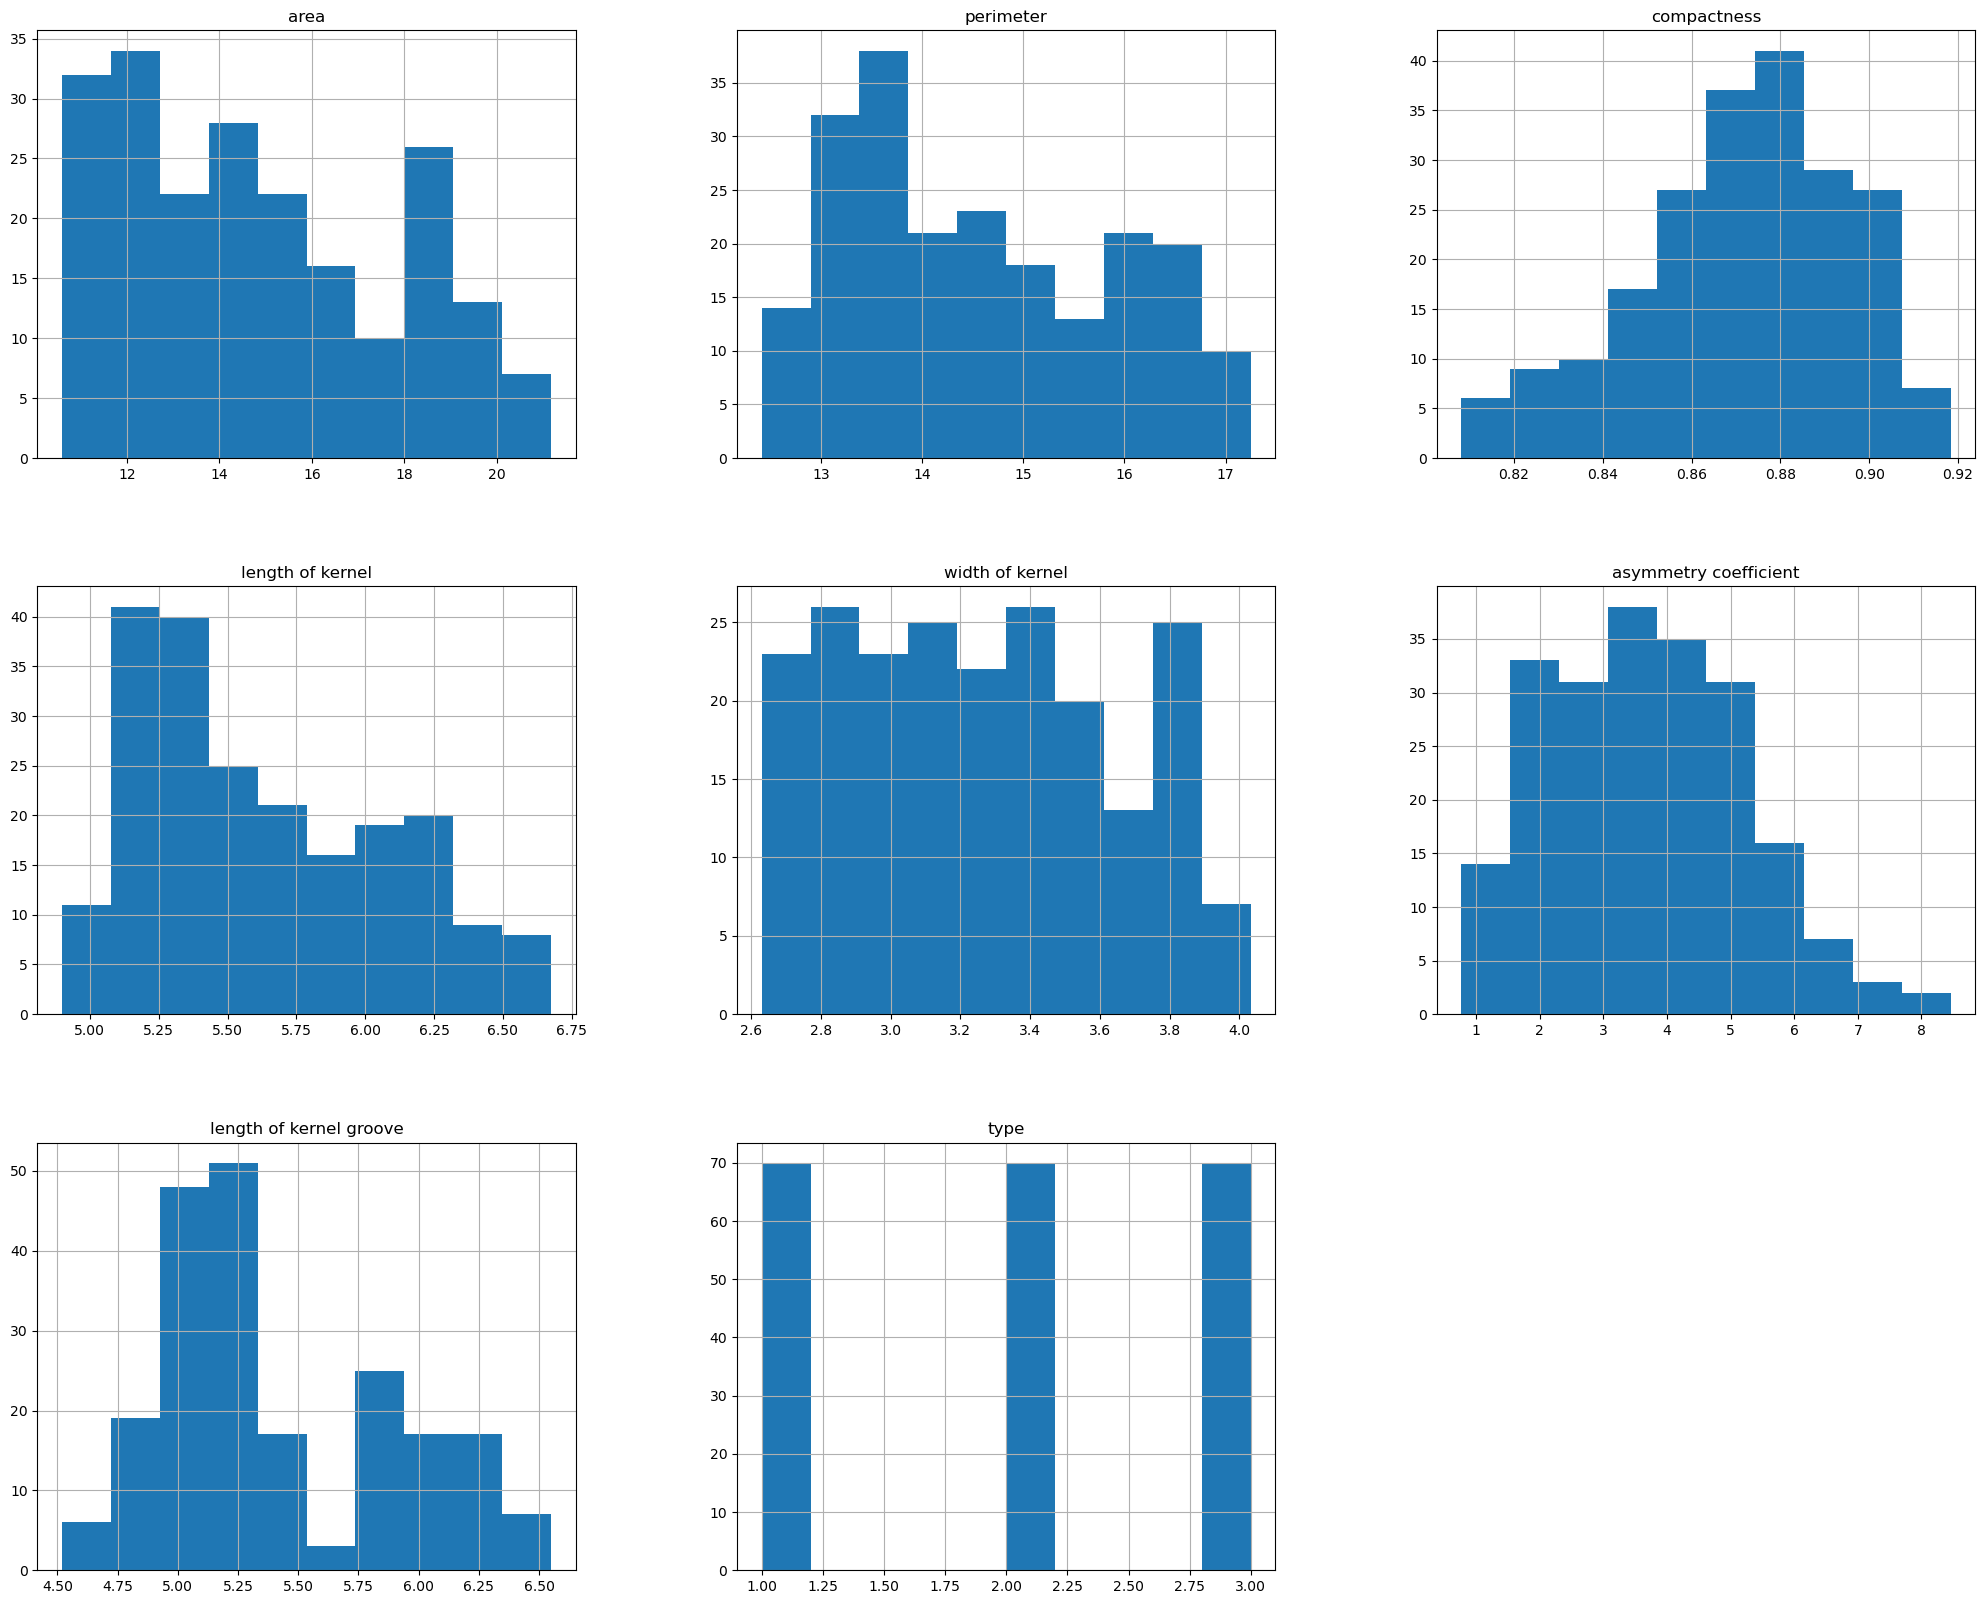

In [14]:
df.hist(figsize=(25,20))

## Data Preperation

We will convert our target column (`type`) into classification types

In [16]:
mapper = {1: 1, 2: 0, 3: 0}
df['type'] = df['type'].replace(mapper)
df['type'].value_counts()

type
0    140
1     70
Name: count, dtype: int64

So now our dataset is inbalanced. 

In [17]:
# y is our target
# x is all the other attributes
y = df['type']
x = df.drop('type', axis=1)

In [18]:
# todo: figure out what Nik is doing with the groupings and outliers

In [ ]:
# todo: pipelines

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)

## Model Training

### SVM

In [ ]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

#### Visualization of the Pipeline

In [20]:
set_config(display='diagram')
pipe

NameError: name 'pipe' is not defined

In [22]:
hyper_parameters = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear', 'poly']
    }

search = GridSearchCV(pipe, hyper_parameters, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print(f"The best CV score is {search.best_score_:0.3f}")
print(f"Best parameters: {search.best_params_}")

SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2838516294.py, line 2)

## Random Forest

In [23]:
# Pipeline
pipe_rf = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

### Visualize Pipeline 2

In [ ]:
set_config(display='diagram')
pipe_rf

### Hyper Tuning

In [ ]:
hyper_parameters_rf = {
    'rf__n_estimators': [10,20,30],
    'rf__max_depth': [2,4,6,8]
}

search_rf = GridSearchCV(pipe_rf, hyper_parameters_rf, n_jobs=-1, cv=5, refit=True)
search_rf.fit(X_train, y_train)
print(f"The best CV score is {search_rf.best_score_:0.3f}")
print(f"Best parameters: {search_rf.best_params_}")

RF_best_params = search_rf.best_params_
RF_best_model = search_rf.best_estimator_

## Naive Bayes

Task 3  
Train a third probabilistic classifier (e.g., MLPClassifier, Naive Bayes, kNN) with seeds.csv add compare it to both SVM and Random Forest. You may encounter warnings for 0 values of some of the metrics. Ignore them and aim at having at least one classifier that has acceptable results.

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
pipe_nb = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', NaiveBayes())])

In [ ]:
set_config(display='diagram')
pipe_nb

In [24]:
# Define the parameter grid
hyper_parameters_nb = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    }

search_nb = GridSearchCV(pipe_nb, hyper_parameters_nb, n_jobs=-1, cv=5, refit=True)
search_nb.fit(X_train, y_train)
print(f"The best CV score is {search_nb.best_score_:0.3f}")
print(f"Best parameters: {search_nb.best_params_}")

NB_best_params = search_nb.best_params_
NB_best_model = search_nb.best_estimator_

NameError: name 'pipe_nb' is not defined

## Compare Classifers on Test Set

In [ ]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [ ]:
def eval_mdl(X_test, y_test, model):
    _probabilities = model.predict_proba(X_test)[:, 1]

    _predicted_values = model.predict(X_test)

    _accuracy = accuracy_score(y_test, _predicted_values)

    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])

    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)

    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])

    _auc = auc(_fpr, _tpr)

    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc


In [ ]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = eval_mdl(X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = eval_mdl(X_test, y_test, RF_best_model)
NB_accuracy, NB_precision, NB_recall, NB_f1_score, NB_tpr, NB_auc = eval_mdl(X_test, y_test, NB_best_model)

In [ ]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
NB_metrics = np.array([NB_accuracy, NB_precision, NB_recall, NB_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'Gaussian Naive Bayes': NB_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, NB_tpr[0,:], lw=2, color='green', label='Gaussian Naive Bayes (AUC = %0.2f)' % (NB_auc), alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

## Training the final model

In [ ]:
# function to remove the string 'svm__' from the names of the parameters in SVM_best_params

# Todo: figure out what this means
def transform(dict):
    return {key.replace('svm__','') :  value for key, value in dict.items()}

pipe = make_pipeline(preprocess_pipeline, svm.SVC(**transform(SVM_best_params)))

final_model =pipe.fit(X, y)

In [ ]:
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))